<div class="alert alert-block alert-info">

# Customer Churn Prediction

## FIT5149 Assignment1
    
#### Student Name: Madeleine Chalmers
#### Student ID: 31222846

Date: 26 October 2021

    
</div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. EDA](#task1) <br>
$\;\;\;\;$[2.1. Univariate analysis](#Univariate) <br>
$\;\;\;\;$[2.1. Summary of Univariate analysis](#SumUnivariate) <br>
$\;\;\;\;$[2.2. Bivariate analysis](#Bivariate) <br>
$\;\;\;\;$[2.2. Summary of Bivariate analysis](#SumBivariate) <br>
$\;\;\;\;$[2.2. Multivariate analysis](#Multivariate) <br>
$\;\;\;\;$[2.2. Summary of Multivariate analysis](#SumMultivariate) <br>
$\;\;\;\;$[2.3. More](#More) <br>
$\;\;\;\;$[2.4. Summary](#Summary) <br>
[3. Model Development](#MD) <br>
[4. Model Scoring on Test Data](#MScore) <br>
[5. Model Interpretation and Inference](#MInterp) <br>
[6. Variable Importance](#VarImp) <br>
[7. Marketing Suggestions](#MarktSugst) <br>
[8. Conclusion](#Conclusion) <br>
[9. References](#Ref) <br>

<div class="alert alert-block alert-warning">

<br>    
    
## 1.  Introduction  <a class="anchor" name="Intro">
    
</a>
</div>
    
The aim here is to build a statistical model which will accurately predict when an insurance company is about to lose their customer. There are sixteen anonymised features in the dataset and one response variable (named 'labels') which indicates churn (1) or no churn (0) for each observation. Two datasets are provided for training (trainSet.csv) and testing (testSet.csv) the models. <br><br>

Data Source: https://www.kaggle.com/mukulsingh/insurance-churn-prediction <br><br>

Section 1: Exploratory data analsis is completed in this section. The data is characterised with single variable exploration, then relationships are explored through correlation and graphical analysis. Findings are discussed along the way and summarised at the end. <br><br>

Section 2: Models which are strong candidates for effective statistical learning given the data discoveries we have made are discussed. The code and development process for two classificaltion model varieties as well as any data transformations required to run them are included, such as one hot encoding and standard scaling of features.<br><br>

Section 3: The final model(s) results are presented and interpreted at the end. Performance metrics are discussed and key features that are strongly associated with the response variable are identified and discussed.<br><br>

Load the required libraries:

In [1]:
library(psych)
#library(GGally) 
library(ggplot2)
library(reshape2)
#library(corrgram)
library(OneR)
library(RColorBrewer)
library(corrplot)
library(gridExtra) 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Warning message:
"package 'OneR' was built under R version 3.6.3"corrplot 0.90 loaded
Warning message:
"package 'gridExtra' was built under R version 3.6.3"

package installations:

In [2]:
#install.packages("psych")
#install.packages("reshape2")
#install.packages("OneR")
#install.packages("ggplot2")
#install.packages("tidyverse")
#install.packages("corrplot")
#install.packages("gridExtra")
#install.packages("")

Read in the test and train datasets that were provided.

In [3]:
# load test dataset
test <- read.csv(file = 'testSet.csv',stringsAsFactors = TRUE)

# load train dataset
train <-  read.csv(file = 'trainSet.csv',stringsAsFactors = TRUE)

<div class="alert alert-block alert-success">

<br>
    
## 2. Exploatory Data Analysis <a class="anchor" name="task1">
    
<br>
    
</a>

#### Using Exploratory Data Analysis (EDA) we will:

1. Explore individual variables, their characteristics such as spread, variance, distribution etc.
2. Identify important features which have a relationship with our label, and how they interact.
3. Explore the qualities of the relationships to identify which models will give strongest results, and how we can transform the data to aid with learning.
4. Identify features with no relationship and exclude them from our models, for improved efficiency and reduced over fitting.
5. Identify features which strongly correlate with one another, to eliminate duplicate information. 
6. Build effective models which are supported by our exploration.

First look at the data

In [4]:
# show the first rows
head(train)

feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
1.5127910,-0.2434605,0.1434182,2.01858846,0.07622994,-0.4114531,-0.2519404,1,1,1,0,1,0,0,0,3,0
-1.5007763,-0.2125875,1.2248391,-0.15984112,-0.56935064,-0.4114531,-0.2519404,8,2,1,0,0,0,0,8,3,0
0.9477471,0.5812426,-0.3372133,0.77987360,-0.56935064,-0.4114531,-0.2519404,0,2,1,0,0,0,2,8,3,0
-0.8415585,-0.2217837,0.5038918,-0.37729577,0.39902023,-0.4114531,-0.2519404,9,1,1,0,0,0,0,1,3,0
-0.5590365,-0.5922597,-1.1783185,-0.41612696,-0.56935064,-0.4114531,-0.2519404,1,2,1,0,1,0,0,8,3,0
0.9477471,-0.4654833,-0.5775291,0.08867847,-0.24656035,2.2551433,2.3528870,4,2,2,1,1,0,0,8,0,0


Check the data types.

In [5]:
# show training the data structure
str(train)

'data.frame':	27126 obs. of  17 variables:
 $ feature_0 : num  1.513 -1.501 0.948 -0.842 -0.559 ...
 $ feature_1 : num  -0.243 -0.213 0.581 -0.222 -0.592 ...
 $ feature_2 : num  0.143 1.225 -0.337 0.504 -1.178 ...
 $ feature_3 : num  2.019 -0.16 0.78 -0.377 -0.416 ...
 $ feature_4 : num  0.0762 -0.5694 -0.5694 0.399 -0.5694 ...
 $ feature_5 : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ feature_6 : num  -0.252 -0.252 -0.252 -0.252 -0.252 ...
 $ feature_7 : int  1 8 0 9 1 4 7 6 6 9 ...
 $ feature_8 : int  1 2 2 1 2 2 1 1 1 1 ...
 $ feature_9 : int  1 1 1 1 1 2 1 2 1 3 ...
 $ feature_10: int  0 0 0 0 0 1 0 0 0 0 ...
 $ feature_11: int  1 0 0 0 1 1 0 1 1 1 ...
 $ feature_12: int  0 0 0 0 0 0 0 1 1 0 ...
 $ feature_13: int  0 0 2 0 0 0 0 2 0 0 ...
 $ feature_14: int  0 8 8 1 8 8 1 6 5 9 ...
 $ feature_15: int  3 3 3 3 3 0 3 3 3 3 ...
 $ labels    : int  0 0 0 0 0 0 0 0 0 0 ...


We want to be certain that the two test and train datasets are compatible with one another. Do they have the same data types? The same features in each?

In [6]:
# Show the testing data structure 
str(test)

'data.frame':	6782 obs. of  17 variables:
 $ feature_0 : num  -1.03 -0.842 -1.501 -0.277 -0.936 ...
 $ feature_1 : num  -0.222 -0.356 -0.265 -0.402 -0.268 ...
 $ feature_2 : num  0.504 -1.539 -1.419 1.826 1.585 ...
 $ feature_3 : num  -0.9054 -0.1055 0.3993 -0.8976 0.0537 ...
 $ feature_4 : num  0.0762 2.9813 -0.5694 6.2092 -0.5694 ...
 $ feature_5 : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ feature_6 : num  -0.252 -0.252 -0.252 -0.252 -0.252 ...
 $ feature_7 : int  0 0 7 0 0 7 5 9 4 1 ...
 $ feature_8 : int  1 1 2 1 2 2 1 1 1 1 ...
 $ feature_9 : int  1 1 1 1 1 1 1 1 2 1 ...
 $ feature_10: int  0 0 0 0 0 0 0 0 0 0 ...
 $ feature_11: int  1 1 1 1 1 1 0 1 1 1 ...
 $ feature_12: int  0 0 1 0 0 1 0 0 0 1 ...
 $ feature_13: int  2 2 2 0 0 2 0 2 0 2 ...
 $ feature_14: int  6 6 6 5 4 8 1 8 3 8 ...
 $ feature_15: int  3 3 3 3 3 3 3 3 3 3 ...
 $ labels    : int  0 0 0 0 0 0 0 0 0 0 ...


We know that our response variable 'labels' is a factor. It appears that feature 7-15 probably are as well, but we want to try and understand for certain which are numeric and which are categoric, so we might apply the right analysis techniques and comparisons.

Below we show the number of unique values in each feature:

In [7]:
#Show the unique values in the features we think could be qualitative
print(apply(train,2,function(x) length(unique(x))))

 feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6 
        77       5901         31       1403         46        499         35 
 feature_7  feature_8  feature_9 feature_10 feature_11 feature_12 feature_13 
        12          3          4          2          2          2          3 
feature_14 feature_15     labels 
        12          4          2 


Since this feature names in this dataset have been de-identified, it's logiical to assume that categoric data could have also been numerically encoded, this would prevent analysts being able to infer the information in those features. If this is the case, we would expect to see them represented by a somewhat small set of integer values. From what we have seen so far, it is certainly possible that our integer data seen above could be categoric, as there are a limited number of values in features 7-15. Next we  check what the possible values are. If they are a set of numeric integers from a condensed range, that will further our case for assuming they are categoric.

Interestingly, it also appears that more than just our integer data is discrete, for example, feature 2 despite being numeric, only takes 31 unique values. By plotting them on a number line, we can see the exact nature of features 1-6. We'll take a closer look after assessing the categoric nature of features 7-14.

In [8]:
#Show the unique values in the features we think could be qualitative
apply(train[,8:17],2,function(x) sort(unique(x)))

$feature_7
 [1]  0  1  2  3  4  5  6  7  8  9 10 11

$feature_8
[1] 0 1 2

$feature_9
[1] 0 1 2 3

$feature_10
[1] 0 1

$feature_11
[1] 0 1

$feature_12
[1] 0 1

$feature_13
[1] 0 1 2

$feature_14
 [1]  0  1  2  3  4  5  6  7  8  9 10 11

$feature_15
[1] 0 1 2 3

$labels
[1] 0 1

This is as close as we can get to evidence that these variables are categoric for now, since there is really no wrong way to explore data, it will be more convenient for us to assume they are categoric. However, we will not change them to factors until we are certain.

It doesn't really serve any purpose to know whether features 0-6 are discrete or not, since it is unlikely for categories to be assigned a decimal value. But, for the sake of knowing, we'll check whether they really are discrete.

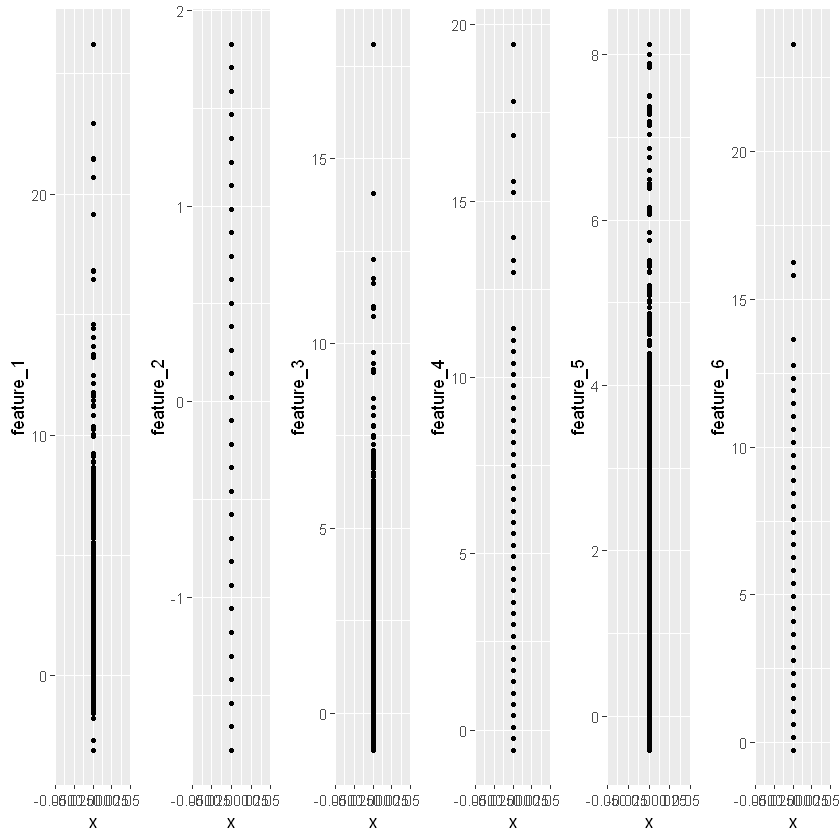

In [9]:
p0 <- ggplot(train, aes(x=0, y=feature_0)) +
  geom_point(size = 1)

p1 <- ggplot(train, aes(x=0, y=feature_1)) +
  geom_point(size = 1)

p2 <- ggplot(train, aes(x=0, y=feature_2)) +
  geom_point(size = 1)

p3 <- ggplot(train, aes(x=0, y=feature_3)) +
  geom_point(size = 1)

p4 <- ggplot(train, aes(x=0, y=feature_4)) +
  geom_point(size = 1)

p5 <- ggplot(train, aes(x=0, y=feature_5)) +
  geom_point(size = 1)

p6 <- ggplot(train, aes(x=0, y=feature_6)) +
  geom_point(size = 1)

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 6)

Yes, it appears that feature 2, 4 and 6 at least are discrete (I'm sure all measurement data is discrete on some level when you look at the lowest resolution though). Knowing all this, we shall proceed with the assumption that features 0-6 are conintuous numeric variables and features 7-15 are categoric. Until such time as it becomes apparent that this should change.

It's also unknown whether the integer variables are a mix of both ordinal and nominal values. For the purpose of exploration we'll keep them as integers (so we can test correlations etc.) and then we'll change any to factor if we find significant motivations to do so.

Below we change the response variable to factor in both test and train data sets, as we do know that the labels are categoric.

In [10]:
#change label and features 7-15 data type to factor in train dataset
#train[,8:17] <- data.frame(lapply(train[,8:17], as.factor))
train$labels <- as.factor(train$labels)

#change label and features 7-15 data type to factor in test dataset
#test[,8:17] <- data.frame(lapply(test[,8:17], as.factor))
test$labels <- as.factor(test$labels)
                     
#always check your work - looks good.
str(train)

'data.frame':	27126 obs. of  17 variables:
 $ feature_0 : num  1.513 -1.501 0.948 -0.842 -0.559 ...
 $ feature_1 : num  -0.243 -0.213 0.581 -0.222 -0.592 ...
 $ feature_2 : num  0.143 1.225 -0.337 0.504 -1.178 ...
 $ feature_3 : num  2.019 -0.16 0.78 -0.377 -0.416 ...
 $ feature_4 : num  0.0762 -0.5694 -0.5694 0.399 -0.5694 ...
 $ feature_5 : num  -0.411 -0.411 -0.411 -0.411 -0.411 ...
 $ feature_6 : num  -0.252 -0.252 -0.252 -0.252 -0.252 ...
 $ feature_7 : int  1 8 0 9 1 4 7 6 6 9 ...
 $ feature_8 : int  1 2 2 1 2 2 1 1 1 1 ...
 $ feature_9 : int  1 1 1 1 1 2 1 2 1 3 ...
 $ feature_10: int  0 0 0 0 0 1 0 0 0 0 ...
 $ feature_11: int  1 0 0 0 1 1 0 1 1 1 ...
 $ feature_12: int  0 0 0 0 0 0 0 1 1 0 ...
 $ feature_13: int  0 0 2 0 0 0 0 2 0 0 ...
 $ feature_14: int  0 8 8 1 8 8 1 6 5 9 ...
 $ feature_15: int  3 3 3 3 3 0 3 3 3 3 ...
 $ labels    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


What proportion of the data is test versus train?

In [11]:
# get the dimentions of each dataset and return the proportion of data in the training dataset
dim(test)[1] / (dim(test)[1] + dim(train)[1])

[1] 0.2000118

The test dataset makes up one fifth of our total data

<div class="alert alert-block alert-success">

### 2.1. Univariate Analysis <a class="anchor" name="Univariate"></a>

How is the response variable distributed? Is it imbalanced? Is it biased?

Percentage rate of churn: 11.73 %

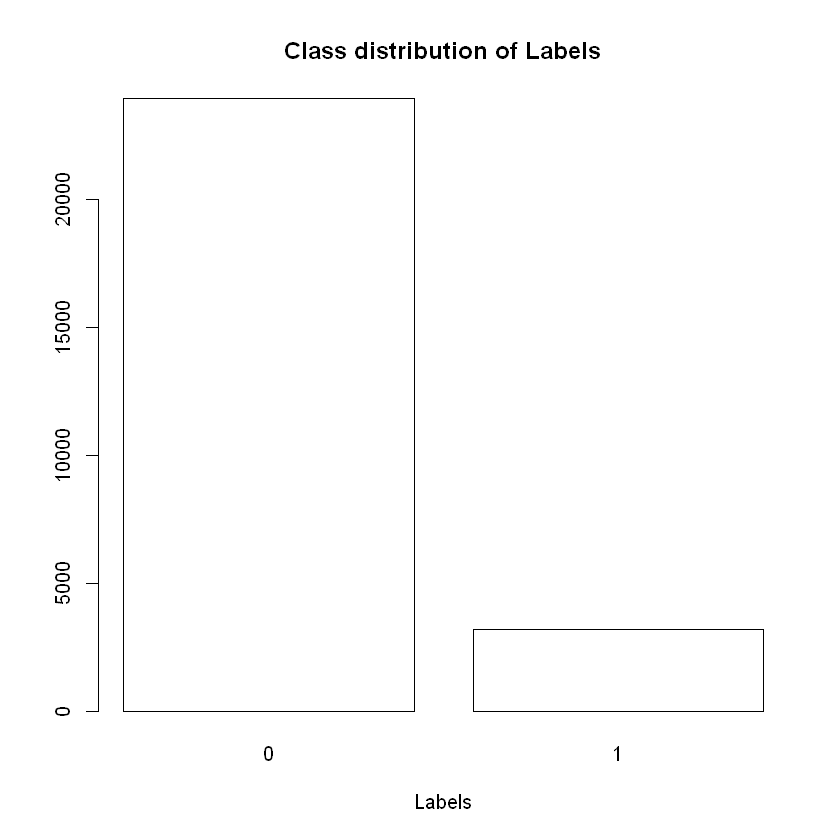

In [12]:
# produce a bar chart showing how many observations in our label data have their class equal to 1 or 0.
barplot(table(train$labels), xlab = "Labels", main = "Class distribution of Labels", col = "white")

# imbalance as a ratio
pc <- round(table(train$labels)[2] / length(train$labels) * 100, 2)
cat('Percentage rate of churn:', pc, '%')

There is no **detectable** bias in the label data, as we do not know any true information about real churn rates compared to the rates observed in this dataset. However, the class distribution in the label is very imbalanced (regardless of bias), this will likely become an issue for some learning algorithms later and will need to be factored in.



Detailed descriptive statistics for continuous data:

In [13]:
# return summary statistics for the train dataset
round(describe(train[,1:7]), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
feature_0,1,27126,-0.005,1.000,-0.182,-0.068,0.977,-2.160,5.091,7.251,0.677,0.292,0.006
feature_1,2,27126,0.001,0.986,-0.297,-0.193,0.223,-3.081,26.223,29.304,7.503,103.612,0.006
feature_2,3,27126,0.004,1.000,0.023,-0.010,1.247,-1.779,1.826,3.605,0.088,-1.058,0.006
feature_3,4,27126,-0.002,0.997,-0.307,-0.186,0.530,-1.002,18.095,19.097,3.157,18.827,0.006
feature_4,5,27126,0.000,1.009,-0.247,-0.210,0.479,-0.569,19.444,20.013,5.101,44.119,0.006
feature_5,6,27126,-0.003,0.997,-0.411,-0.285,0.000,-0.411,8.128,8.539,2.639,7.088,0.006
feature_6,7,27126,-0.009,0.795,-0.252,-0.197,0.000,-0.252,23.626,23.878,7.360,96.290,0.005


Some initital findings from summary statistics:
- **Missing Data:** There is no missing data in any features
- **Mean:** The data all appear to have relatively similar means, ranging between values of -1 and 6
- **Median:** The range of median values is slightly wider than the mean, but not by much.
- **Standard Deviation / Error:** Once standardised (using standard error), this data all has very similar spread.
- **Range:** The range of values in all the data only spread from (approximately) -2 to 24. Feature 1 has the widest range of all, next to 3, 4 and 6.
- **Skew:** Feature 1 & 6 have highest skew, in the positive direction.
- **Range:** Features 1 & 6 have the widest range.
- **Kurtosis:** Features 1, 4 & 6 have relatively high kurtosis, making their tails very short. Conversely, quite a few variables have longer tails, measuring no lesser than -1.06 though.
- **Scaling:** there has been no feature scaling yet (e.g. min-max scaling), we may need to do this for some types of statistical model
- **Expected Data Characteristics:** Given that we don't have any particular knowledge about each feature, we cannot comment on the expected or unexpected characteristics of each variable. Only that our response variable has two classes, 0 and 1 which represent churn and no churn as expected.

Descriptive statistics for discrete data:

In [14]:
summary(data.frame(lapply(test[,8:17], as.factor)), maxsum = 12)

# table and prop.table information is way to extensive to interpret here
#table(test[,8:16])

 feature_7 feature_8 feature_9 feature_10 feature_11 feature_12 feature_13
 0 : 806   0: 788    0:1014    0:6652     0:2925     0:5680     0:4361    
 1 :1432   1:4021    1:3527    1: 130     1:3857     1:1102     1: 428    
 2 : 220   2:1973    2:1946                                     2:1993    
 3 : 182             3: 295                                               
 4 :1408                                                                  
 5 : 354                                                                  
 6 : 225                                                                  
 7 : 640                                                                  
 8 : 135                                                                  
 9 :1160                                                                  
 10: 179                                                                  
 11:  41                                                                  
 feature_14 feature_15 la

Qualitative data ranges from 2 to 12 categories. None are evenly distributed, while many have a clear preference towards one class over the others, such as feature_13 which has 17,617 in class '0' and less than 10,000 observations in the other two classes ('1' & '2') combined.

Histograms and Density Plots for our continuous data:

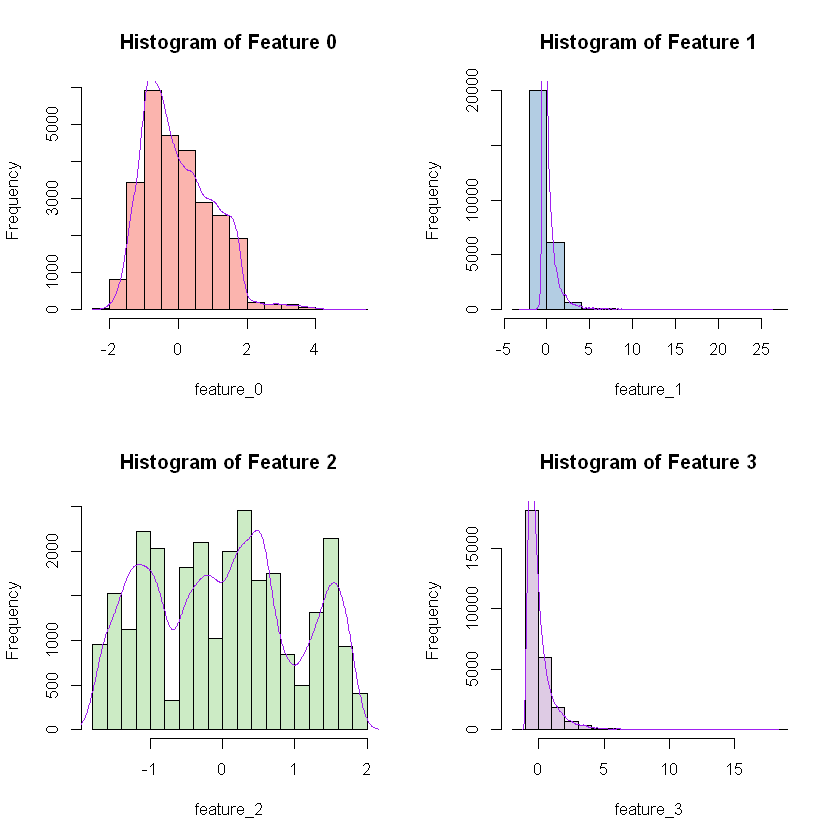

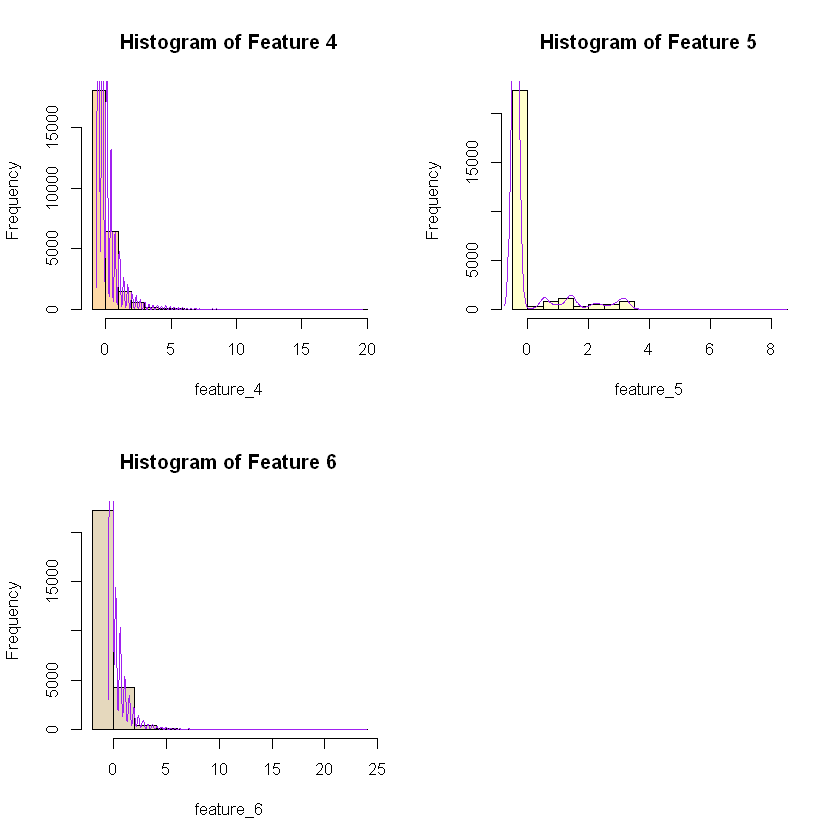

In [15]:
#increase scale size of jupyter plots for some very detailed ones momentarily.
options(jupyter.plot_scale=1) 

# Histogram for features 0 to 6
par(mfrow = c(2,2))
for (i in 1:7 ) {
    h <- hist(train[,i], plot=FALSE)
    plot(h, main=paste("Histogram of Feature", i-1), xlab = names(train[i]), col = brewer.pal(8, name = "Pastel1")[i])
    d <- density(train[,i])
    lines(x = d$x, y = d$y * length(train[,i]) * diff(h$breaks)[1], col = "purple", lwd = 1.5)
}

The histograms seem to tell us that the data here is a mix of left skewed (0), exponential (1, 3, 4 & 6) and uniformly (2?) distributed features are seen here. But the density plots say a whole lot more. Most of our exponential data is just very highly right skewed unimodal. Our questionably uniform feature (2) could alternatively be multimodal.  There are also some interesting artefacts on features 4 & 6, some kind of decaying harmonic oscillation. Feature 5 appears to have some kind of normal distribution with a right tail, could be right skewed unimodel, or it could be something else, it might help to take a closer look.

Below we use log scaling to look more closely at the tail end of the data in feature 5.

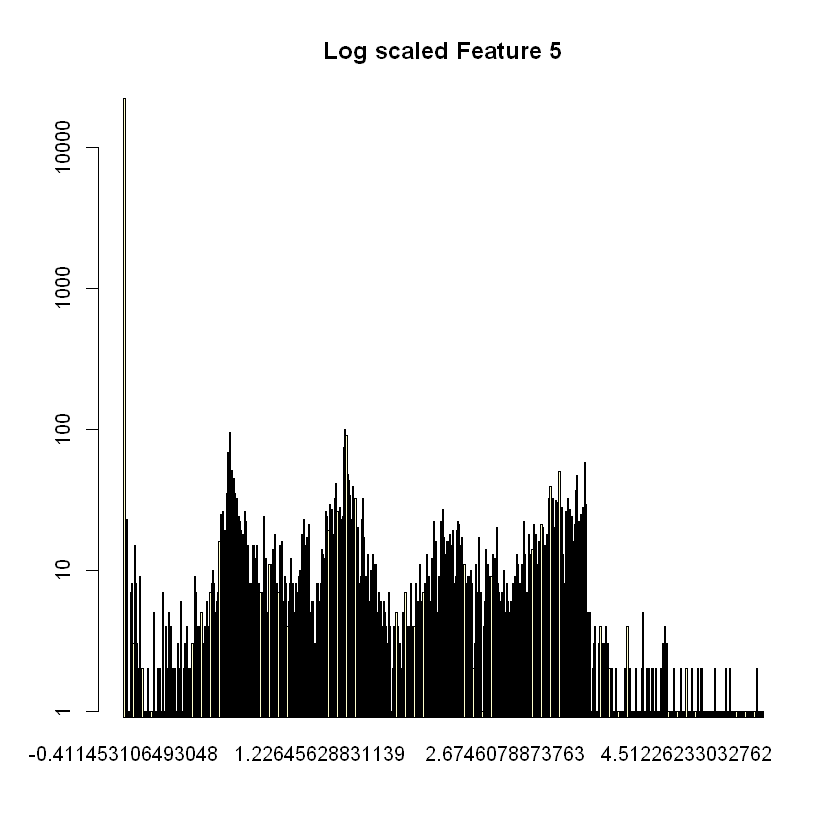

In [16]:
barplot(table(train[,6]), log="y", xlab = names(train[,6]), main = paste("Log scaled Feature", 5), col = brewer.pal(8, name = "Pastel1")[6])

This is definately not the best chart option for the job, but it does have an in-built log scale. It shows that the data could be multimodal.

It could be improved with binning:

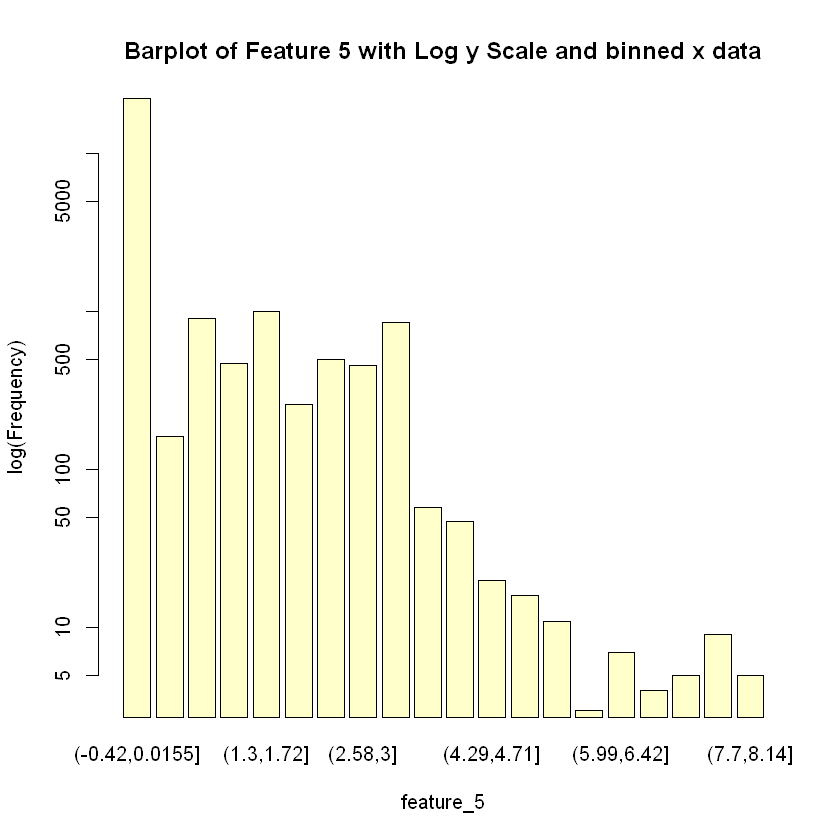

In [17]:
barplot(table(bin(train[,6], nbins = 20)), log = "y", xlab = "feature_5", ylab = "log(Frequency)", main = "Barplot of Feature 5 with Log y Scale and binned x data", col = brewer.pal(8, name = "Pastel1")[6])

This is quite unusual, not an easily identifiable distribution.

Moving on. Bar chart exploration for our (assumed) qualitative data:

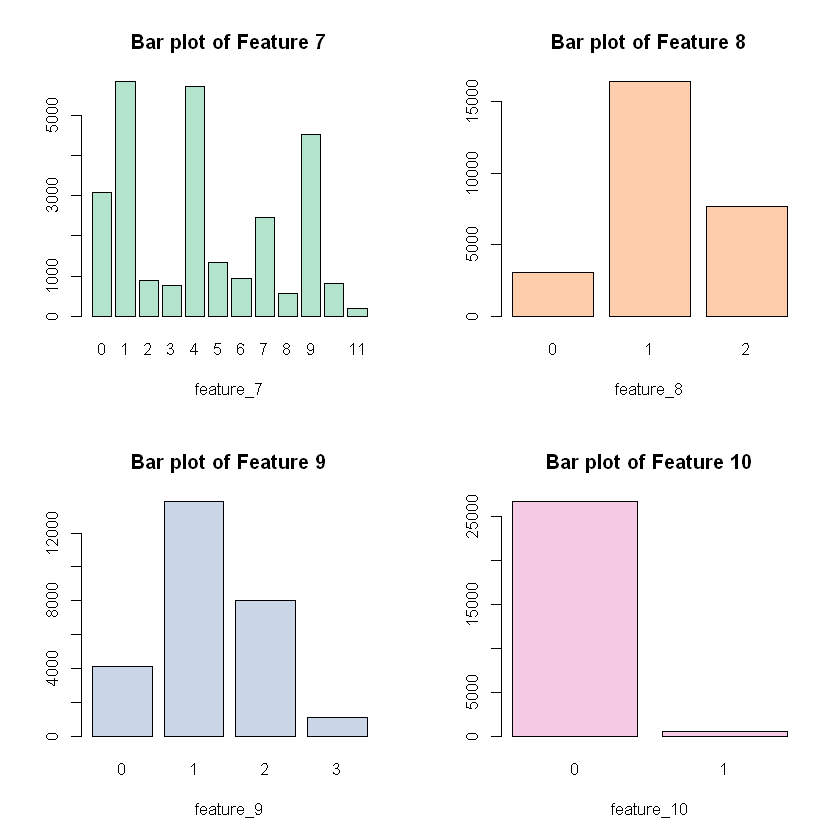

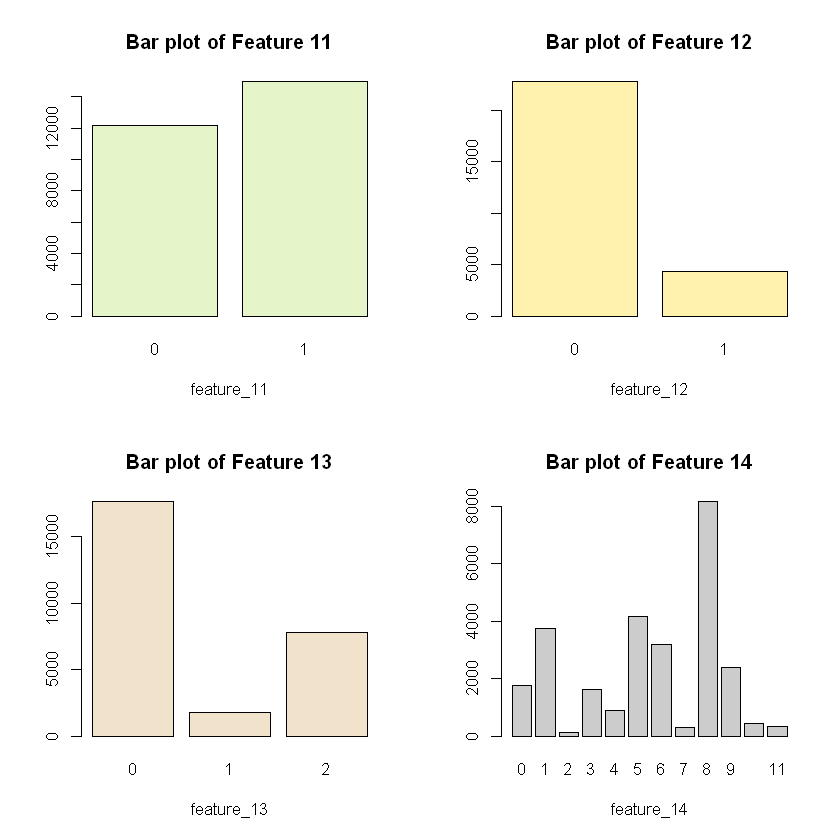

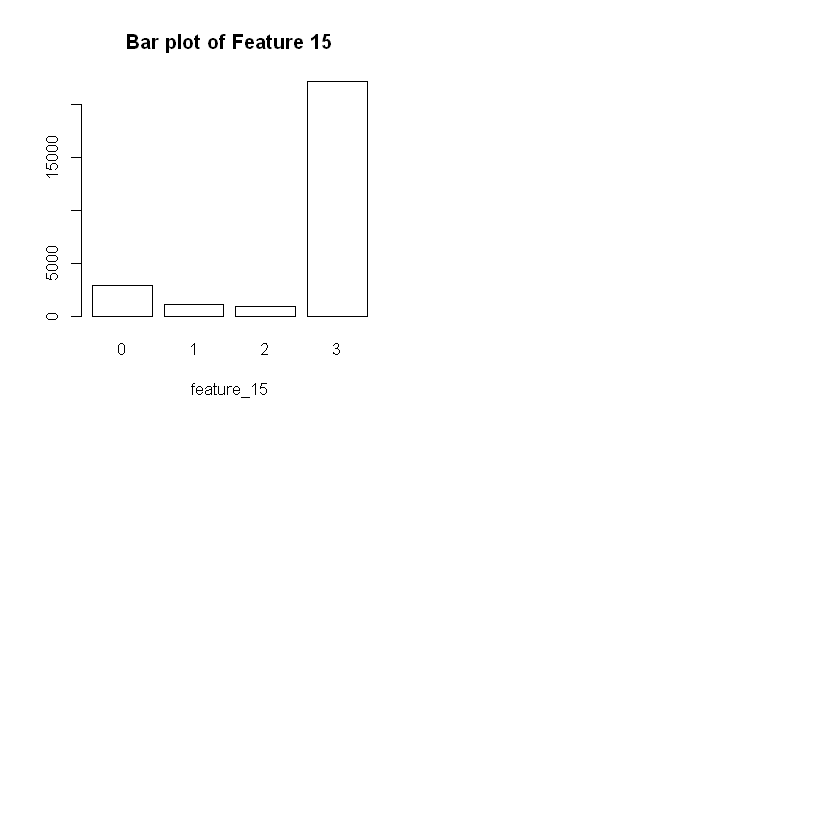

In [18]:
# Bar chart for features 7 to 15
par(mfrow = c(2,2))
for (i in 8:16 ) {
        barplot(table(train[,i]), xlab = names(train[i]), main = paste("Bar plot of Feature", i-1), col = brewer.pal(8, name = "Pastel2")[i-7])
}

As found earlier, features 10, 11, 12 and the label are binomial. Features 10 & 12 are primarliy distributed at zero. Feature 11 on the otherhand is a little more evenly distributed.

The rest of our features are multinomial with little patterning to them.

<div class="alert alert-block alert-success">

### 2.2. Summary of Univariate Analysis <a class="anchor" name="SumUnivariate"></a>

### Quantitative vs Qualitative Variables:

We have identified that features 0-6 are continuous, of those 2,4 & 6 appear to be discrete. As discussed earlier, we continue with the assumption that features 7-15 are categoric. It is possible that their (features 7-15) distributions and/or relationships with other variables could reveal the possibility of a rank or logical order, therefore their erratic distributions (notably in feature 7, 14 & 15) could be an indication that they are nominal (have no order or rank), we cannot really know for certain which features are ordinal or nominal though. This information is important to establish early so that we may choose appropriate visual exploration methods and determine whether dummy encoding is needed for specific learning algorithms later on.

### Distributions:
Other notable observations incluide that feature 0, 1, 3, 4 & 6 are all skewed (although the histogram would have you beleive otherwise). Feature 5 looks interesting, it could be skewed unimodal, bimodal or something else entirely. Meanwhile feature 2 is fairly uniformly distributed (possibly 7 and 11 too). Many of the integer features (7 and above) show a clear imbalance where one class is prefenced (particularly 10, 12 and 15). Features 8 and 9 show some degree of normal distribution however, if it is categoric this is probably not the case. It's hard to determine what information 7 & 14 have to give us, they are discrete with no clear distribution meaning that they could be nominal variables with no clear rank or order, these would be prime candidates for tree methods or dummy encoding for other learning methods.

### Labels class imbalance
The response variable is not evenly distributed. The majority class (0 / No Churn) is very dominant here and so we expect that some learning algorithms will significantly favour this class for positive prediction unless we compensate. Resampling or shifting probability thresholds may be necessary so as not to introduce bias in our learning/modelling algorithms.

### Other notes
Feature scaling has not been completed on this dataset. Some learning algorithms might need us to preform this. There is no missing data in any features and since we don't have any particular knowledge about each feature, we cannot comment more generally on the expected or unexpected characteristics of each variable, such as the range of values and outliers.
_________________________

<div class="alert alert-block alert-success">

### 2.3. Bivariate Analysis <a class="anchor" name="Bivariate"></a>

Checking for highly colinear features.

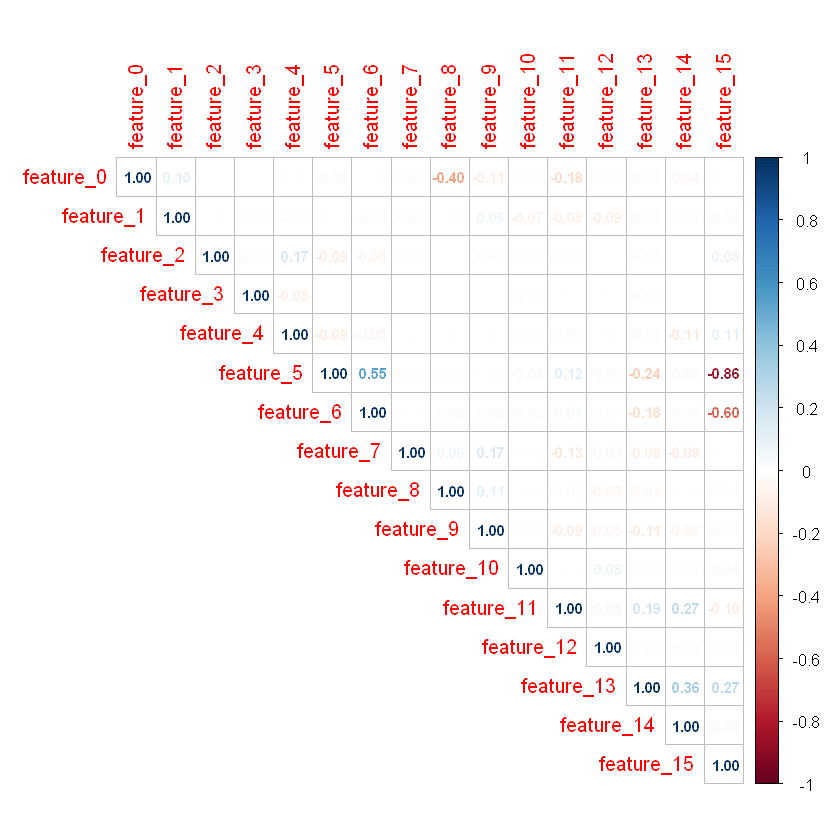

In [19]:
# exclude our label from correlation data since it is a factor
cor <- cor(train[-17])

# plot correlations
corrplot(cor, method = 'number', type = 'upper',number.cex=0.75)

Feature 15 and 5 are highly negatively correlated, 15 and 6 are somewhat similar too. Features 5 & 6 are positively correlated with each other, which probably exaplins their similar relationship with 15. Feature 15 or 5 & 6 should be removed. Feature 0 & 8 are also somewhat negatively correlated. Otherwise, correlation between other varibles are almost zero.

Next we take a quick peek at the pair wise relationships in our data:

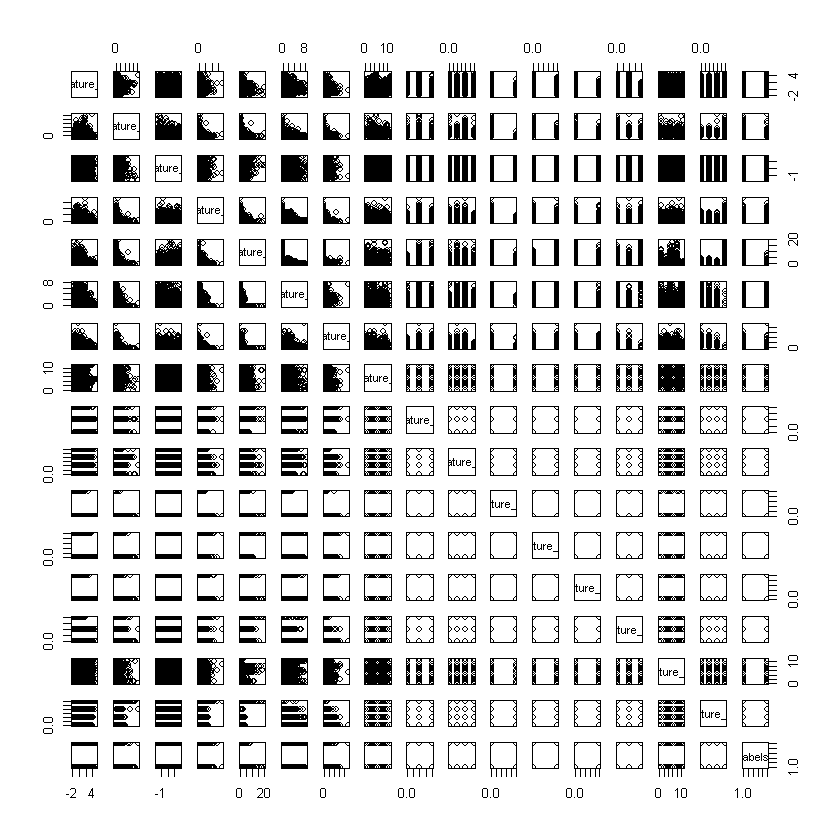

In [20]:
pairs(train)

There are no other descerable realtionships other than those we already established.

In [21]:
cor(train[,-17], as.numeric(train[,17])) 

feature_0,0.01550229
feature_1,0.05064085
feature_2,-0.02975611
feature_3,0.39008974
feature_4,-0.07615220
feature_5,0.11057683
feature_6,0.11904202
feature_7,0.03671097
feature_8,0.04254066
feature_9,0.06883864
feature_10,-0.02411465


It appears that feature 3 (cor = 0.39) will be our most important predictor. It stands out above all other features with more than twice the correlation coefficient of any other.

### Comparing continuous variables against the categoric label:

Side by side box plots are ideal for comparing the continuous variables against our categoric response variable (labels). Many outliers have been deliberately removed with boxplots rescaled, as it was difficult to see the main quantiles of the distributions.

Warning message:
"Removed 4955 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2705 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2602 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2691 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1314 rows containing non-finite values (stat_boxplot)."

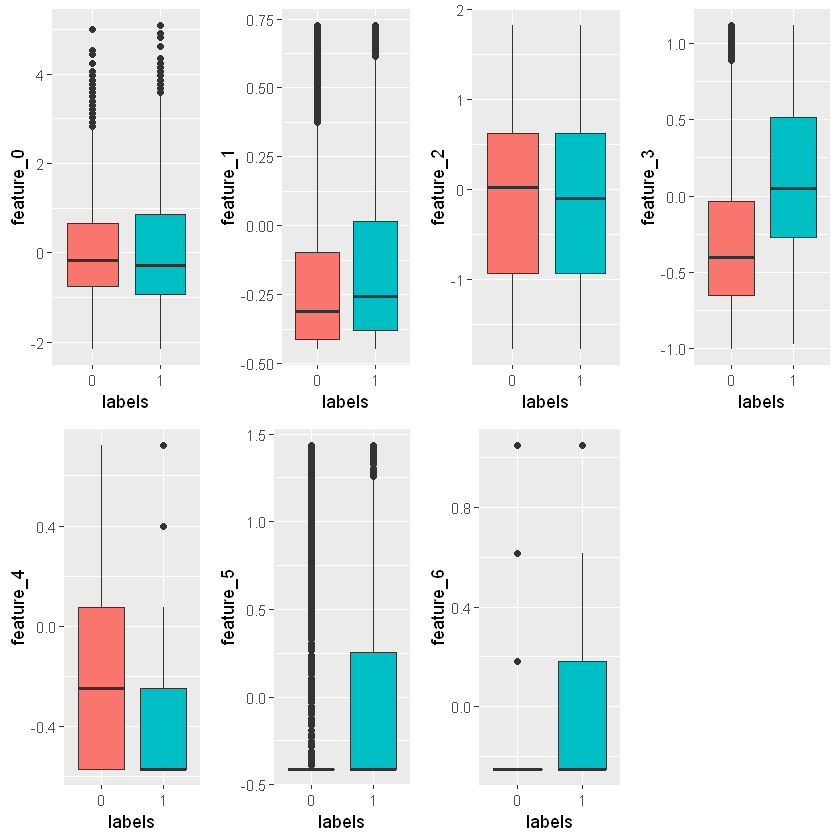

In [22]:
p1 <- ggplot(train, aes(x=factor(labels), y=train[,1], fill=factor(labels))) + 
          geom_boxplot()+
          #scale_y_continuous(limits = c(quantile(train[,1], c(0.1, 0.9))[1], quantile(train[,1], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[1]) +
          guides(fill="none")

p2 <- ggplot(train, aes(x=factor(labels), y=train[,2], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,2],c(0.1, 0.9))[1], quantile(train[,2], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[2]) +
          guides(fill="none")

p3 <- ggplot(train, aes(x=factor(labels), y=train[,3], fill=factor(labels))) + 
          geom_boxplot()+
          #scale_y_continuous(limits = c(quantile(train[,3], c(0.1, 0.9))[1], quantile(train[,3], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[3]) +
          guides(fill="none")

p4 <- ggplot(train, aes(x=factor(labels), y=train[,4], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,4], c(0, 0.9))[1], quantile(train[,4], c(0, 0.9))[2]))+
          labs(x = "labels",y = names(train)[4]) +
          guides(fill="none")

p5 <- ggplot(train, aes(x=factor(labels), y=train[,5], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,5], c(0, 0.9))[1], quantile(train[,5], c(0, 0.9))[2]))+
          labs(x = "labels",y = names(train)[5]) +
          guides(fill="none")

p6 <- ggplot(train, aes(x=factor(labels), y=train[,6], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,6], c(0.1, 0.9))[1], quantile(train[,6], c(0.1, 0.9))[2]))+
          labs(x = "labels",y = names(train)[6]) +
          guides(fill="none")

p7 <- ggplot(train, aes(x=factor(labels), y=train[,7], fill=factor(labels))) + 
          geom_boxplot()+
          scale_y_continuous(limits = c(quantile(train[,7], c(0, 0.95))[1], quantile(train[,7], c(0, 0.95))[2]))+
          labs(x = "labels",y = names(train)[7]) +
          guides(fill="none")


grid.arrange(p1, p2, p3, p4, p5, p6, p7, ncol = 4)

These box plots reveal that features 1 & 3 exhibit higher mean for churn (1) compared to no churn (0). Feature 0 has a wider distribution for churn than no churn. Feature 2 has a slightly lower mean for churn but the same overall spread. feature 5 & 6 appear to be very similar, with the same mean but greater spread for churn. Lastly, feature 4 has lower mean and spread for churn. These are explored in increased detail below with density plots. There are a great many potential outliers sitting outside the third quartile in all except feature 3.

Warning message:
"Removed 619 rows containing non-finite values (stat_density)."Warning message:
"Removed 726 rows containing non-finite values (stat_density)."Warning message:
"Removed 111 rows containing non-finite values (stat_density)."Warning message:
"Removed 447 rows containing non-finite values (stat_density)."

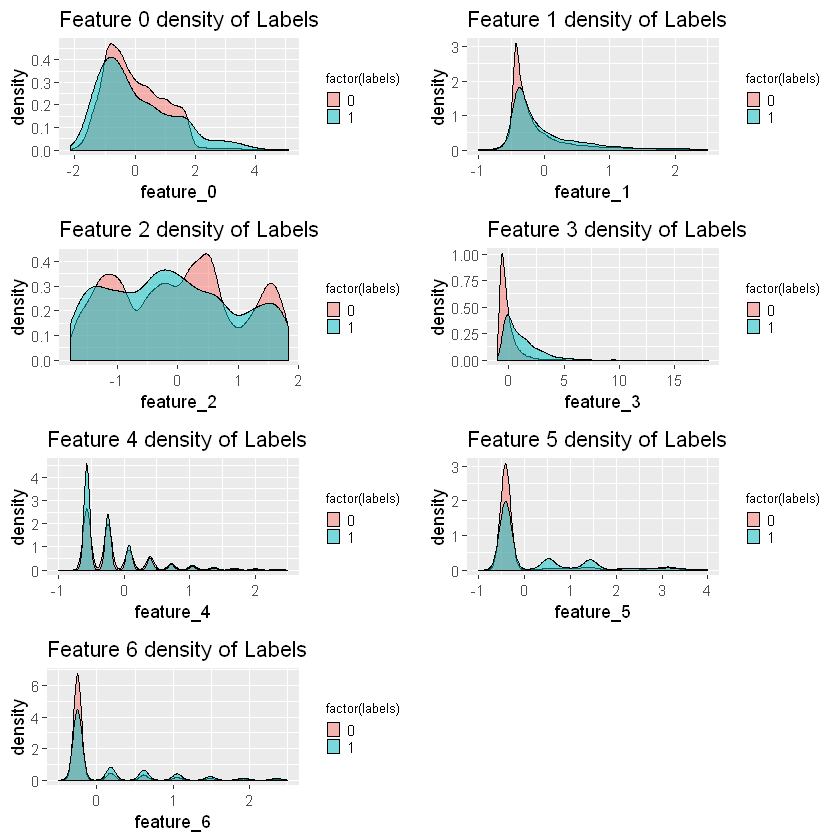

In [23]:
p1 <- ggplot(train) +
  geom_density(aes(x = feature_0, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_0') +
  ggtitle("Feature 0 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))

p2 <- ggplot(train) +
  geom_density(aes(x = feature_1, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_1') +
  ggtitle("Feature 1 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-1,2.5))

p3 <- ggplot(train) +
  geom_density(aes(x = feature_2, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_2') +
  ggtitle("Feature 2 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))

p4 <- ggplot(train) +
  geom_density(aes(x = feature_3, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_3') +
  ggtitle("Feature 3 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))

p5 <- ggplot(train) +
  geom_density(aes(x = feature_4, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_4') +
  ggtitle("Feature 4 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-1,2.5))

p6 <- ggplot(train) +
  geom_density(aes(x = feature_5, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_5') +
  ggtitle("Feature 5 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-1,4))

p7 <- ggplot(train) +
  geom_density(aes(x = feature_6, fill = factor(labels)), alpha=.5) +
  labs(x = 'feature_6') +
  ggtitle("Feature 6 density of Labels")+
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8)) +
  xlim(c(-0.5,2.5))

grid.arrange(p1, p2, p3, p4, p5, p6, p7, ncol = 2)

These compartisons for features 0, 1 & 3 are explained well enough by their boxplots. The additional detail in features 2, 4,5 & 6 is interesting. Features 4, 5 and 6 appear to have similar distributions for churn versus no churn, however they differ in the magnitude of their peaks - feature 4's high peak colours are are the inverse of 5 & 6.

Feature 2 is different, it has churn and no churn peaks in different places. It now appears more multimodal than uniformly distributed.

The difference in mean and spread for each label class in features 1 & 3 remains convincing as a strong predictors.

### Comparing two categoric variables
Bar charts are used to compare features 7-15 against their labels. Since there is substantial imbalance between the churn and no churn rates, we use a percentage scale for comparisons.

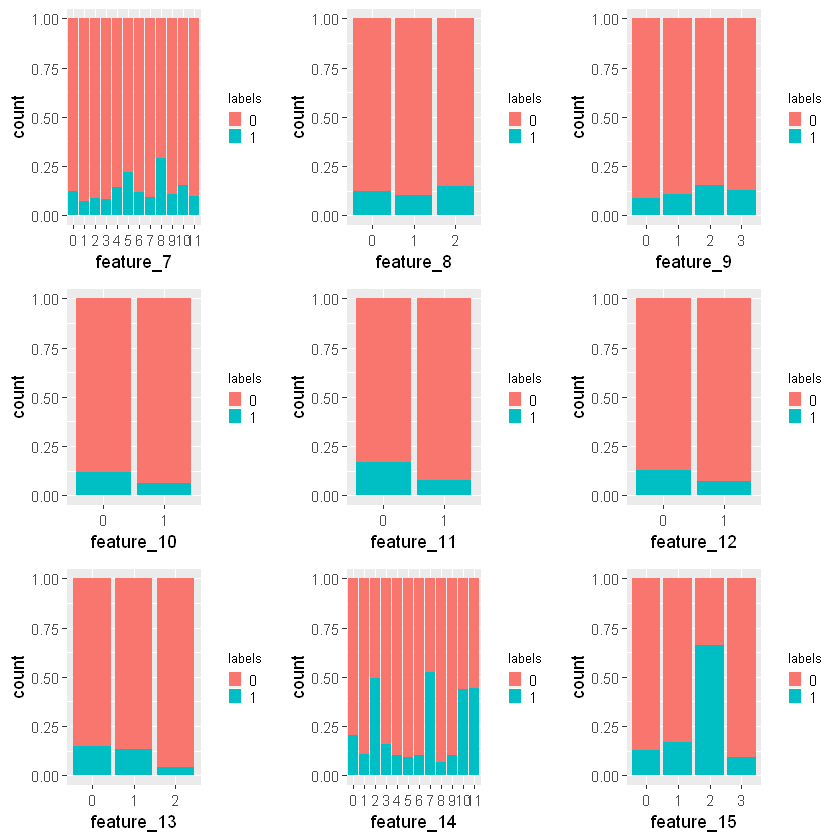

In [24]:
p7<- ggplot(train, aes(x = factor(feature_7), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_7')

p8<- ggplot(train, aes(x = factor(feature_8), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_8')

p9<- ggplot(train, aes(x = factor(feature_9), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_9')

p10<- ggplot(train, aes(x = factor(feature_10), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_10')

p11<- ggplot(train, aes(x = factor(feature_11), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_11')

p12<- ggplot(train, aes(x = factor(feature_12), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_12')

p13<- ggplot(train, aes(x = factor(feature_13), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_13')

p14<- ggplot(train, aes(x = factor(feature_14), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_14')

p15<- ggplot(train, aes(x = factor(feature_15), fill = labels)) + 
  geom_bar(position = "fill") +
  theme(legend.key.size = unit(0.3, 'cm'), legend.title = element_text(size=8))+
  xlab('feature_15')


grid.arrange(p7, p8, p9, p10, p11, p12, p13, p14, p15, ncol = 3)

The overall imbalance in this dataset's labels dictates that churn (1/blue) should be roughly around 12% of the counts. We see substantial deviation from this for some category values in feature 7, 14 and 15. These could be helpful in predicting churn. Because we see no obvious trends in the way the data is split for churn and no churn within these features, this might indicate there is no ordinal relationship between the categories and that dummy encoding would be beneficial in the modelling stage.

<div class="alert alert-block alert-success">

### 2.4. Summary of Bivariate Analysis <a class="anchor" name="SumBivariate"></a>

In this section correlation was measured between features. Feature 15 and 5 are highly negatively correlated, 15 and 6 are somewhat similar too. Since we feel feature 15 could be a strong categoric predictor, features 5 & 6 should be removed.

Correlation against the label is used to identify that feature 3 could be our most important predictor.

Boxplots of the numeric variables broken down by label confirms again that feature 3 has a lot of promise as a predictor. Additionally feature 1 may be of importance. Density plots reveal little extra detail that is helpful above what has been found so far. 

Boxplots also show that there are a great many potential outliers sitting outside the third quartile in all features except feature 3.

The bar charts of our assumed categoric data show that features 7, 14, 15 have categories which deviate from the expected 12% churn rate for some particular categories, also highlighting that they could prove very useful as predictors.

<div class="alert alert-block alert-success">

### 2.5. Multivariate Analysis <a class="anchor" name="Multivariate"></a>

### Analysing interactions between two continuous variables and the label:
In this section we have explored interactions between all continuous variables with colour sepration of the label, only those with interactions of interest have been kept and discussed. If there is no difference of behaviour seen between the churn and no churn label, the plot was removed.

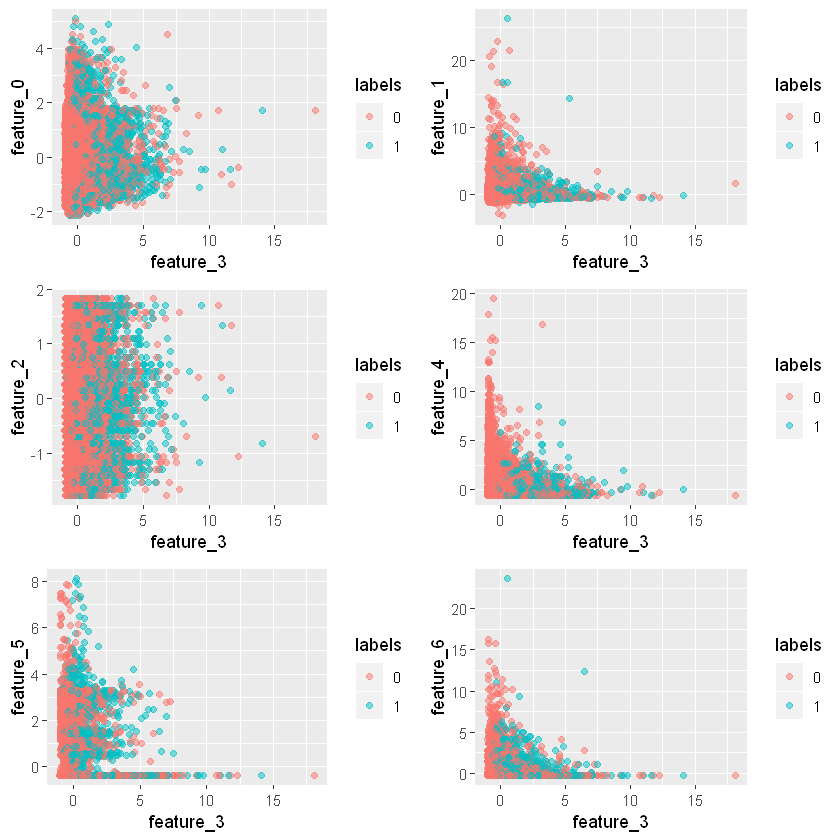

In [25]:
p0 <- ggplot(train, aes(x=feature_3, y=feature_0)) +
        geom_point(aes(colour = labels), alpha=.5)

p1 <- ggplot(train, aes(x=feature_3, y=feature_1)) +
        geom_point(aes(colour = labels), alpha=.5)

p2 <- ggplot(train, aes(x=feature_3, y=feature_2)) +
        geom_point(aes(colour = labels), alpha=.5)

p4 <- ggplot(train, aes(x=feature_3, y=feature_4)) +
        geom_point(aes(colour = labels), alpha=.5)

p5 <- ggplot(train, aes(x=feature_3, y=feature_5)) +
        geom_point(aes(colour = labels), alpha=.5)

p6 <- ggplot(train, aes(x=feature_3, y=feature_6)) +
        geom_point(aes(colour = labels), alpha=.5)

grid.arrange(p0, p1, p2, p4, p5, p6, ncol = 2)

During this exploration we only found clear/noticable separation of the label classes (1/Blue = Churn) in plots that involve feature 3.

Feature 0 x 3: Churn is more commonly found towards the right

Feature 1 x 3: Churn is more commonly found towards the lower right

Feature 2 x 3: Churn is more commonly found towards the right. This appears to be a much more uniform separation than for some other features.

Feature 4 x 3: Churn is more commonly found towards the lower right

Feature 5 x 3: Churn is more commonly found towards the right

Feature 6 x 3: Churn is more commonly found towards the lower right

### Analysing interactions between a continuous and discrete variable with the label:

In this section we have explored interactions between all continuous and discrete variable combinations with colour sepration of the label, only those with interactions of interest have been kept and discussed. If there is no difference of behaviour seen between the churn and no churn label, the plot was removed. Also, if there was no new behaviours not already discovered during earlier exploration, the plot was removed.

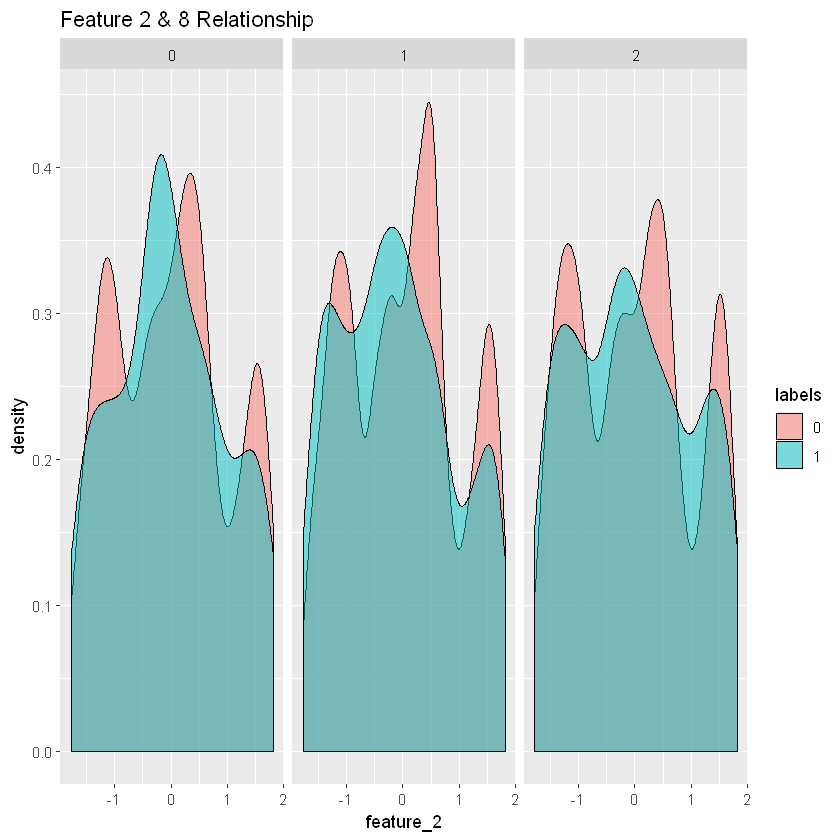

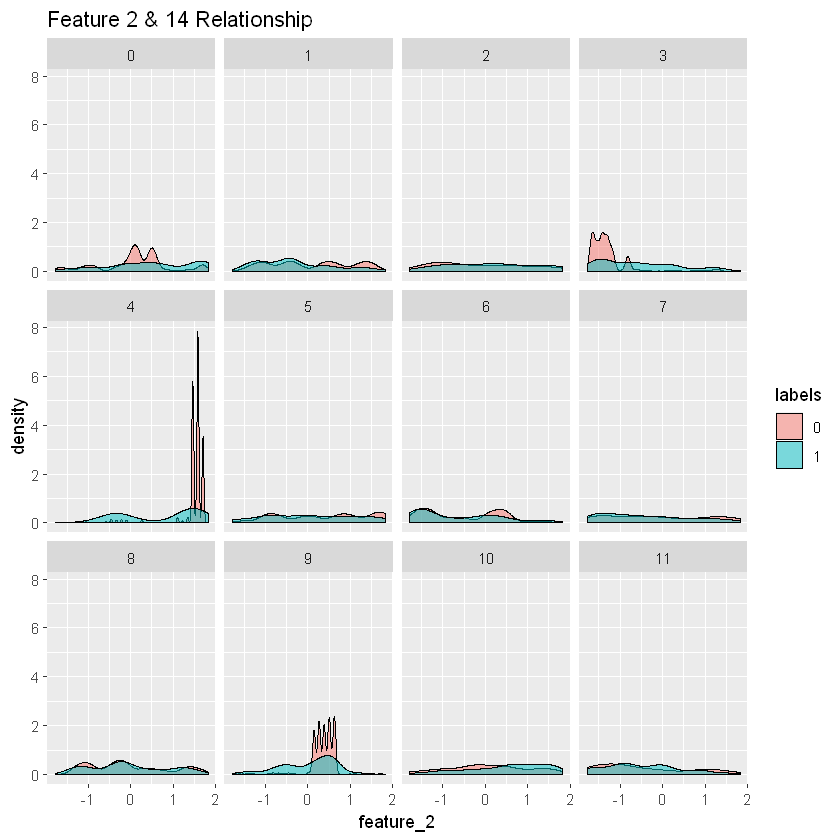

In [26]:
ggplot(aes(x=feature_2),data =train) + 
    geom_density(aes(fill = labels), alpha=.5) +
    facet_wrap(~feature_8) +
    ggtitle('Feature 2 & 8 Relationship')

ggplot(aes(x=feature_2),data =train) + 
    geom_density(aes(fill = labels), alpha=.5) +
    facet_wrap(~feature_14) +
    ggtitle('Feature 2 & 14 Relationship')

Exploration of feature 2's interactions with other categories was quite interesting. In general, it seems to have four or more peaks that rise and fall (independantly for churn and no churn) depending on the feature and category, the interaction between feature 2 & 8 is shown as an example of this. Additionally, the interaction between 2 and 14 is quite unique, it is not clear how to interpret this information currently - perhaps conversion into a discrete form (such as binning into four groups) would make this variable more useful, but this is hard to justify without background knowledge of the data.

### Analysing interactions between two categoric variables with the label:

Mosaic plots were used to explore category interactions.

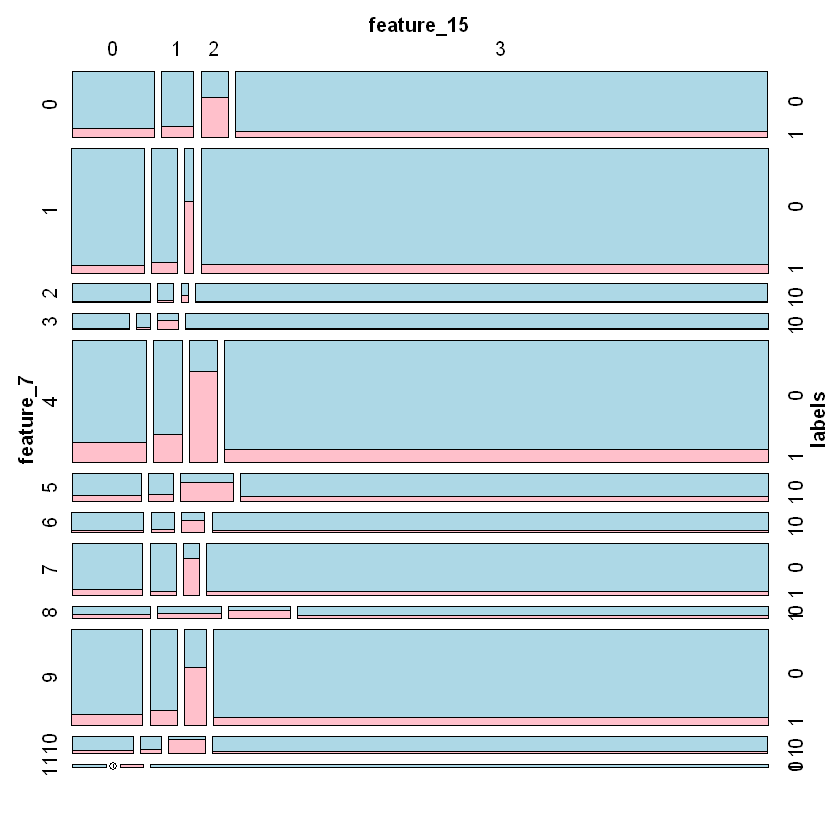

In [31]:
library(vcd)

mosaic( ~ feature_7 + feature_15 + labels, data = train,
      highlighting = "labels", highlighting_fill = c("lightblue", "pink"))

No new discoveries were made using this method, it only confirmed what we already knew, that features 14 & 15 have categories with much higher churn rates than others.

<div class="alert alert-block alert-success">

### 2.6. Summary of Multivariate Analysis <a class="anchor" name="SumMultivariate"></a>

Numeric variable interactions again confirmed feature 3's significance.

Numeric and categorical interactions showed unusual peaks in feature 2 that appear to move independently for churn and no churn groups. As discussed earlier, this behaviour seems reminiscent of cateorical behaviour. It's possible that conversion into a discrete form (such as binning into four groups) would make this variable more useful, but this is hard to justify without background knowledge of the data.

No new discoveries were made using mosaic plots to compare categoric interactions, it only confirmed what we already knew, that features 14 & 15 have some categories with much higher churn rates than others.

<div class="alert alert-block alert-success">

### 2.3. More <a class="anchor" name="More"></a>

As we have seen, there are few variables which correlate highly with our response variable, meaning that linear models may not be an appropriate choice of model over more complex analysis techniques such QDA, KNN or Tree methods. We will test our most highly correlated variable, feature 3 to see if these is a case for creating an LDA model for this data.

<div class="alert alert-block alert-success">

### 2.4. EDA Summary <a class="anchor" name="Summary"></a>

Univariate 
- small vs wide variance
- Normality
- Skew, should it be fixed?
Bivariate
- How much information do they share?
- Colinear label and feature makes a very important feature, lower coreltation less so
- If classes appear to be very seperate, linear model could be good, otherwise maybe a more complex model

<div class="alert alert-block alert-success">

<br>
    
## 3. Model Development <a class="anchor" name="MD">
    
<br>
    
</a>

Before we continue, we must decide what metric is important to us in predicting churn. We have been informed that customer acquisition and retention are equally important, and the former being a more expensive process. So it is possible that the client would prefer to take preventative measures against a wider margin of customers that are at risk of leaving rather than allowing some to slip through the gaps. In terms of metrics, we are talking about ensuring we have a (near) 100% true positive rate for the churn category at the expense of lower overall accuracy and/or to over estimating false positives, that customers who do not plan to leave are predicted to do so. Recall would be an appropriate metric to maximise in this instance.

Alternative, they may care only about accuracy or precision. 

We will assume that recall is an important metric in this analysis, but that there needs to be some balance so as not to be issuing preventative measures on every single customer, therefore F1 score seems like the best metric to optimise in this case. F1 will balance recall against precision with the formula:

$$Recall = \frac{True Positive}{True Positive + False Negative}$$

$$Precision = \frac{True Positive}{True Positive + False Positive}$$

$$F_{1} = 2 *  \frac{Precision * Recall}{Precision + Recall}$$

- Explain choice of model


Choices are:
- LDA
- QDA
- Logistic
- KNN*
- Decision Tree/ Random Forest*

Say something like: The data relationships looked very complex, so non linear methods were chosen. Or the linear relationships were very strong, so we chose logistic regression.


In this section we want to use validation data for tuning our models. We will take this from the training set:

In [32]:
# keep 75% of dataset for training
sample <- floor(0.75 * nrow(train))

# Split the data, making sure it always uses the same subset for repeatability
set.seed(123)
index <- sample(seq_len(nrow(train)), size = sample)
training <- train[index, ]
validation <- train[-index, ]

# check that we split as intended
cat("Rows in training:",dim(training)[1], ". Rows in validation:", dim(validation)[1])

Rows in training: 20344 . Rows in validation: 6782

# GLM Model

In [33]:
fit.glm = glm(labels ~ ., data = training, family = binomial)
summary(fit.glm)


Call:
glm(formula = labels ~ ., family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.6240  -0.4496  -0.2866  -0.1663   3.1268  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.012093   0.149687 -20.123  < 2e-16 ***
feature_0    0.062430   0.026584   2.348 0.018854 *  
feature_1    0.057648   0.021493   2.682 0.007315 ** 
feature_2   -0.040336   0.025750  -1.566 0.117244    
feature_3    1.017157   0.023393  43.482  < 2e-16 ***
feature_4   -0.406763   0.045664  -8.908  < 2e-16 ***
feature_5    0.399528   0.037513  10.650  < 2e-16 ***
feature_6    0.232267   0.027945   8.311  < 2e-16 ***
feature_7    0.011476   0.008034   1.428 0.153161    
feature_8    0.199744   0.046442   4.301 1.70e-05 ***
feature_9    0.231526   0.034352   6.740 1.58e-11 ***
feature_10  -0.657668   0.290773  -2.262 0.023711 *  
feature_11  -1.008315   0.056617 -17.809  < 2e-16 ***
feature_12  -0.728579   0.086328  -8.440  < 2e

In [34]:
anova(fit.glm, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,20343,14711.77,NA
feature_0,1,3.086638,20342,14708.68,7.893776e-02
feature_1,1,47.429718,20341,14661.25,5.701177e-12
feature_2,1,14.662393,20340,14646.59,1.285864e-04
feature_3,1,2300.839877,20339,12345.75,0.000000e+00
feature_4,1,129.712394,20338,12216.03,4.736689e-30
feature_5,1,235.574175,20337,11980.46,3.628856e-53
feature_6,1,69.558013,20336,11910.90,7.419970e-17
feature_7,1,44.916305,20335,11865.99,2.056385e-11
feature_8,1,54.970603,20334,11811.02,1.223462e-13


In [35]:
with(fit.glm, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0

In [36]:
probs <- predict(fit.glm, type = "response")
pred.glm <- rep("0", length(probs))
pred.glm[probs > 0.5] <- "1"
Direction = training$labels
table(pred.glm, Direction)

        Direction
pred.glm     0     1
       0 17594  1851
       1   363   536

In [37]:
mean(pred.glm == Direction)

[1] 0.8911718

# QDA Model

In [41]:
library(MASS)
library(caret)

Loading required package: lattice


All variables:

In [42]:
fit.qda = qda(labels ~ ., data = training)
fit.qda

Call:
qda(labels ~ ., data = training)

Prior probabilities of groups:
        0         1 
0.8826681 0.1173319 

Group means:
     feature_0   feature_1   feature_2  feature_3   feature_4  feature_5
0 -0.007486544 -0.01855936  0.01765289 -0.1478869  0.03042777 -0.0431478
1  0.031099357  0.14630275 -0.06447961  1.0805558 -0.20166451  0.3063362
    feature_6 feature_7 feature_8 feature_9  feature_10 feature_11 feature_12
0 -0.03860669  4.287186  1.161942  1.205658 0.018767055  0.5786044 0.16895918
1  0.24258035  4.691663  1.240888  1.378718 0.005865103  0.3648932 0.08923335
  feature_13 feature_14 feature_15
0  0.6876427   5.562343   2.589018
1  0.2697947   5.258902   2.348136

In [44]:
pred.qda <- predict(fit.qda, validation)
confusionMatrix(pred.qda$class, validation[,17], positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5383  421
         1  604  374
                                          
               Accuracy : 0.8489          
                 95% CI : (0.8401, 0.8573)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.336           
                                          
 Mcnemar's Test P-Value : 1.31e-08        
                                          
            Sensitivity : 0.47044         
            Specificity : 0.89911         
         Pos Pred Value : 0.38241         
         Neg Pred Value : 0.92746         
             Prevalence : 0.11722         
         Detection Rate : 0.05515         
   Detection Prevalence : 0.14421         
      Balanced Accuracy : 0.68478         
                                          
       'Positive' Class : 1               
                        

Our chosen variables:

In [45]:
fit.qda = qda(labels ~ feature_1+ feature_3+ feature_14 + feature_15, data = training)
fit.qda

Call:
qda(labels ~ feature_1 + feature_3 + feature_14 + feature_15, 
    data = training)

Prior probabilities of groups:
        0         1 
0.8826681 0.1173319 

Group means:
    feature_1  feature_3 feature_14 feature_15
0 -0.01855936 -0.1478869   5.562343   2.589018
1  0.14630275  1.0805558   5.258902   2.348136

In [46]:
pred.qda <- predict(fit.qda, validation)
confusionMatrix(pred.qda$class, validation[,17], positive="1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5749  591
         1  238  204
                                          
               Accuracy : 0.8778          
                 95% CI : (0.8697, 0.8855)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 0.903           
                                          
                  Kappa : 0.2686          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.25660         
            Specificity : 0.96025         
         Pos Pred Value : 0.46154         
         Neg Pred Value : 0.90678         
             Prevalence : 0.11722         
         Detection Rate : 0.03008         
   Detection Prevalence : 0.06517         
      Balanced Accuracy : 0.60843         
                                          
       'Positive' Class : 1               
                        

# KNN Model

In [47]:
library(class)

All features:

In [48]:
pred.knn1 <- knn(training[,-17],validation[,-17],cl=training[,17],k=10)

In [50]:
#table(pred.knn1,validation$labels)
confusionMatrix(pred.knn1, validation[,17], positive="0")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5857  600
         1  130  195
                                          
               Accuracy : 0.8924          
                 95% CI : (0.8847, 0.8996)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 0.006958        
                                          
                  Kappa : 0.3006          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9783          
            Specificity : 0.2453          
         Pos Pred Value : 0.9071          
         Neg Pred Value : 0.6000          
             Prevalence : 0.8828          
         Detection Rate : 0.8636          
   Detection Prevalence : 0.9521          
      Balanced Accuracy : 0.6118          
                                          
       'Positive' Class : 0               
                        

In [52]:
i=1
k.optm=1
for (i in seq(1,50)){
    pred.knn1 <- knn(training[,-17],validation[,-17],cl=training[,17],k=i)
    k.optm[i] <- 100 * confusionMatrix(pred.knn1, validation[,17], positive="0")$overall[1]
    k=i
    cat(k,'=',k.optm[i],'')
}

1 = 87.61427 2 = 87.51106 3 = 88.98555 4 = 89.05927 5 = 89.36892 6 = 89.16249 7 = 89.20672 8 = 89.51637 9 = 89.29519 10 = 89.30994 11 = 89.2657 12 = 89.44264 13 = 89.47213 14 = 89.29519 15 = 89.25096 16 = 89.38366 17 = 89.29519 18 = 89.4279 19 = 89.36892 20 = 89.30994 21 = 89.30994 22 = 89.39841 23 = 89.23621 24 = 89.23621 25 = 89.14774 26 = 89.08876 27 = 89.07402 28 = 89.08876 29 = 89.05927 30 = 89.02978 31 = 89.02978 32 = 88.92657 33 = 88.89708 34 = 88.94132 35 = 88.80861 36 = 88.91183 37 = 88.85285 38 = 88.89708 39 = 88.82336 40 = 88.77912 41 = 88.76438 42 = 88.82336 43 = 88.67591 44 = 88.66116 45 = 88.7054 46 = 88.69065 47 = 88.69065 48 = 88.73489 49 = 88.72014 50 = 88.74963 

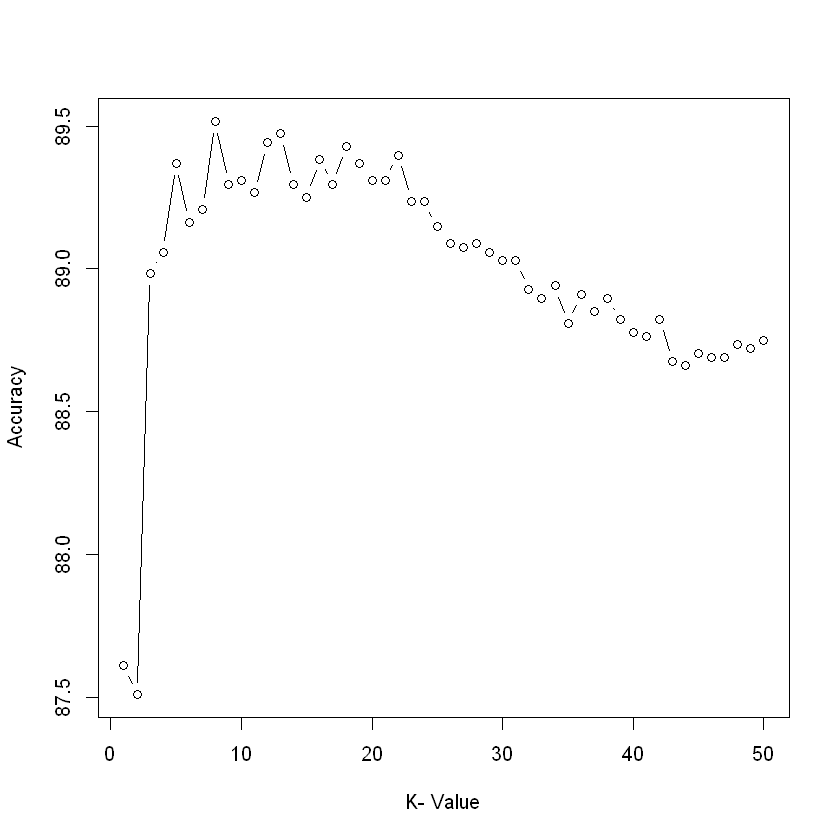

In [53]:
plot(k.optm, type="b", xlab="K- Value",ylab="Accuracy")

Our chosen features:

In [54]:
pred.knn2 <- knn(training[,c(2,4,15,16)],validation[,c(2,4,15,16)],cl=training[,17],k=10)

In [55]:
confusionMatrix(pred.knn2, validation[,17], positive="0")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5776  505
         1  211  290
                                          
               Accuracy : 0.8944          
                 95% CI : (0.8869, 0.9016)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 0.001339        
                                          
                  Kappa : 0.3925          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9648          
            Specificity : 0.3648          
         Pos Pred Value : 0.9196          
         Neg Pred Value : 0.5788          
             Prevalence : 0.8828          
         Detection Rate : 0.8517          
   Detection Prevalence : 0.9261          
      Balanced Accuracy : 0.6648          
                                          
       'Positive' Class : 0               
                        

In [56]:
i=1
k.optm=1
for (i in seq(1,50)){
    pred.knn2 <- knn(training[,c(2,4,15,16)],validation[,c(2,4,15,16)],cl=training[,17],k=i)
    k.optm[i] <- 100 * confusionMatrix(pred.knn2, validation[,17], positive="0")$overall[1]
    k=i
    cat(k,'=',k.optm[i],'')
}

1 = 86.18402 2 = 86.28723 3 = 88.51371 4 = 88.7054 5 = 89.2657 6 = 89.2657 7 = 89.22147 8 = 89.36892 9 = 89.30994 10 = 89.35417 11 = 89.5606 12 = 89.63433 13 = 89.81127 14 = 89.89973 15 = 89.91448 16 = 89.81127 17 = 89.89973 18 = 89.87024 19 = 89.81127 20 = 89.8555 21 = 90.00295 22 = 90.04718 23 = 90.01769 24 = 89.97346 25 = 89.94397 26 = 90.04718 27 = 89.95871 28 = 89.8555 29 = 89.89973 30 = 89.91448 31 = 89.91448 32 = 89.79652 33 = 89.82601 34 = 89.73754 35 = 89.76703 36 = 89.76703 37 = 89.84075 38 = 89.79652 39 = 89.82601 40 = 89.84075 41 = 89.84075 42 = 89.8555 43 = 89.88499 44 = 89.87024 45 = 89.84075 46 = 89.97346 47 = 89.84075 48 = 89.76703 49 = 89.75229 50 = 89.78178 

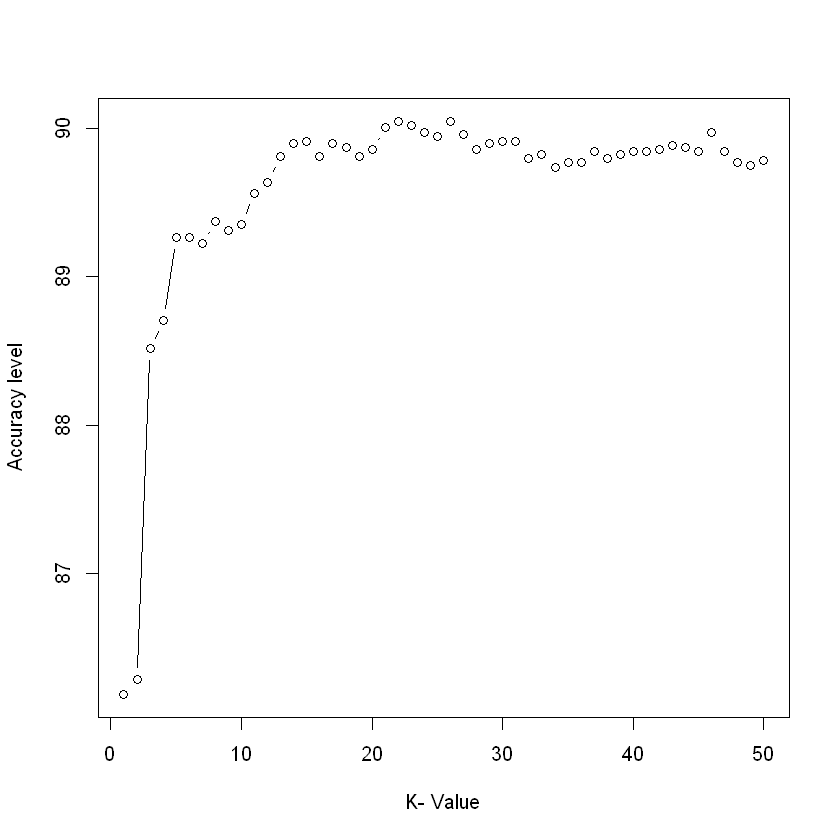

In [57]:
plot(k.optm, type="b", xlab="K- Value",ylab="Accuracy level")

# Tree Model

In [58]:
#install.packages("tree")
require(tree)

Loading required package: tree
Warning message:
"package 'tree' was built under R version 3.6.3"

In [60]:
tree.fit1 <- tree(labels~., data=training)
summary(tree.fit1)


Classification tree:
tree(formula = labels ~ ., data = training)
Variables actually used in tree construction:
[1] "feature_3"  "feature_13" "feature_11" "feature_5"  "feature_14"
[6] "feature_15"
Number of terminal nodes:  10 
Residual mean deviance:  0.5063 = 10300 / 20330 
Misclassification error rate: 0.107 = 2176 / 20344 

In [61]:
tree.pred1 = predict(tree.fit1, validation, type="class")

In [62]:
#table(tree.pred,validation$labels)
confusionMatrix(tree.pred1, validation[,17], positive="0")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5688  476
         1  299  319
                                          
               Accuracy : 0.8857          
                 95% CI : (0.8779, 0.8932)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 0.2315          
                                          
                  Kappa : 0.3889          
                                          
 Mcnemar's Test P-Value : 2.58e-10        
                                          
            Sensitivity : 0.9501          
            Specificity : 0.4013          
         Pos Pred Value : 0.9228          
         Neg Pred Value : 0.5162          
             Prevalence : 0.8828          
         Detection Rate : 0.8387          
   Detection Prevalence : 0.9089          
      Balanced Accuracy : 0.6757          
                                          
       'Positive' Class : 0               
                        

Try only including our favorite vars:

In [64]:
tree.fit2 <- tree(labels~ feature_1+feature_3+ feature_14 + feature_15, data=training)
summary(tree.fit2)

tree.pred2 = predict(tree.fit2, validation, type="class")

confusionMatrix(tree.pred2, validation[,17], positive="0")


Classification tree:
tree(formula = labels ~ feature_1 + feature_3 + feature_14 + 
    feature_15, data = training)
Variables actually used in tree construction:
[1] "feature_3"  "feature_15" "feature_14"
Number of terminal nodes:  8 
Residual mean deviance:  0.5251 = 10680 / 20340 
Misclassification error rate: 0.107 = 2176 / 20344 

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5698  470
         1  289  325
                                          
               Accuracy : 0.8881          
                 95% CI : (0.8803, 0.8955)
    No Information Rate : 0.8828          
    P-Value [Acc > NIR] : 0.08947         
                                          
                  Kappa : 0.4             
                                          
 Mcnemar's Test P-Value : 6.421e-11       
                                          
            Sensitivity : 0.9517          
            Specificity : 0.4088          
         Pos Pred Value : 0.9238          
         Neg Pred Value : 0.5293          
             Prevalence : 0.8828          
         Detection Rate : 0.8402          
   Detection Prevalence : 0.9095          
      Balanced Accuracy : 0.6803          
                                          
       'Positive' Class : 0               
                        

<div class="alert alert-block alert-success">

<br>
    
## 4. Model Scoring on Test Data <a class="anchor" name="MScore">
    
<br>
    
</a>

Use Pre, recall, etc. ROC, F1

<div class="alert alert-block alert-warning">

<br>
    
## 5. Model Interpretation and Inference<a class="anchor" name="MInterp">
    
<br>
    
</a>

Comment on accuracy etc
Interpretability
For similarly scoring models, factor in time to run and complexity
What are the hyperparameters and what do they mean

From the reading material:
Understanding the association between X1, X2, X3, etc. and Y (Page 19)
- Which predictors are associated with the response?
- What is the relationship between the response and each predictor? (Is it pos/neg correlated, is there greater complexity such as one variable depending on the value of another?)
- Can the relationship between Y and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

<div class="alert alert-block alert-warning">

<br>
    
## 5.1 Variable Importance <a class="anchor" name="VImp">
    
<br>
    
</a>

Read up on shapely value:
https://onezero.blog/machine-learning-model-explanation-using-shapley-values/

<div class="alert alert-block alert-warning">

<br>
    
## 7. Marketing Suggestions <a class="anchor" name="MarktSugst">
    
<br>
    
</a>

What features would you suggest are important. What to do more of or less of? Target Audience (observation ranges) to focus on? Assuming the data represents client characeteristics and behaviour, suggest which features and ranges are most and least ilkely to leave.

<div class="alert alert-block alert-warning">

<br>
    
## 8. Conclusion <a class="anchor" name="Conclusion">
    
<br>
    
</a>

In [ ]:
names(fit.glm)

In [ ]:
fit.glm$df.residual

Analysis steps taken and the outcome at each step.

<div class="alert alert-block alert-info">
    
## 9. References <a class="anchor" name="Ref"></a>

Du, L. & Liu, M. (2021). Regression Analysis with Linear Models [Lecture notes]. Retrieved from https://lms.monash.edu/.

<div class="alert alert-block alert-danger">

# Assignment submission ends here - Delete before completion

    
</div>

# Best predictors:
- Corelation: Feature 15 and 5 are highly correlated, 15 and 6 are somewhat similar too, it's possible these pairs carry the same information. We should remove feature 15 or 5 & 6. We will need to look at how each of these relate to our label before deciding which to remove.
- Box plots indicate that there is label dependancy in most features. 0 has a wider distribution in class 1 than 0, distributions in feature 1 are offset from one another, there is an even wider offset in feature 3. Features 4...while 5 and 6 have the same mean but longer tails on label 1 relative to 0.
- Density plots tells us that...
- segmented bar plots tell us...


# Worst Predictors:
- 10 and 12 have low variance, which will likely make them poor predictors.
- Box plots indicate that feature 2 has the least dependancy on label class. 
- Density plots tells us that...
- segmented bar plots tell us...


# Interactions:
- 


# Overall variables of significance and insignificance
- ?

### Model selection and justification
Clearly explained how the models were developed with sufficient supporting information derived from exploratory data analysis and proper statistical diagnostics.

The exploratory analysis and diagnostics logically lead to the development of the models (including attribute/feature selection).

# Modelling

### Model quality comparison
Critically assess the accuracy of the models with in-depth statistical analysis. 

The comparison is logical and solid with an appropriate level of details. 

Demonstrates a high-level of understanding of the differences (i.e., advantages and disadvantages) between the models in regard to the task.

# Summary
Explanation of why the chosen subset of attributes have a significant impact on the prediction of the response variable.
- The subset of attributes leading to the prediction are identified and clearly justified with in-depth statistical analysis.
- The description and accompanying interpretation are comprehensible and convincing, in line with the findings from the model development.

The quality of the Jupiter notebook/ the R Markdown file, quality and readability of the R implementation.
- The Jupyter  Notebook is well structured in a logical order that clearly supports the development of the answers.
- The R code is logically structured and easy to read.
- Concise but precise code comments clearly explain how the code is intended to work.
- The redundant or unnecessary code is excluded from the final submission.


# Questions:
- The Week 2 tutorial explores the relationship between many variables with one another. Are we interested in just the relationships that we wish to predict? Why would we explore other relationships aside from just looking for duplicated information?
- Check for duplicates still?


# Concerns to follow up before modelling
- Resample data to even out label class
- Are categoric data ordinal? Should they be one hot encoded? Specifically look at 7, 8, 9, 13, 14, 15.
- Feature scaling might be needed for some models
- 

# Suggestions
If there is time:
- Convert legends to say Churn / No churn rather than 0/1
- set labels to factor type
- plot pairs to highlight potentially non-linear relationships between variables. The nagain, scatter plots are for numeric & numeric comparison. So only features 0 - 6 should be done.


# Rejection Zone...probably don't need this code but not 100% sure yet.

In [ ]:
# One stop shop, crashes everything...
library(GGally)
ggpairs(train, aes(color = labels)) + theme_bw()

The correlation between each feature and the labels.

I don't think we should use this....

In [ ]:
par(mfrow = c(4,4))
for (i in 1:(length(train) - 1)) {
        plot(train[,i], train$labels, ylab = 'labels', xlab = names(train)[i])
}

There appear to be differences in the distribution of data for each label correlated with features 1, 4 and 6. It is questionable whether this is also the case for 1, 3 and 5. These features should be explored further using geom_density filled by label to distinguish...

Correlation measurements are for the most part relatively low, the top 5 include:
1. -0.855 between features 5 & 15
2. -0.596	between features 15 & 6
3. 0.547	between features  5 & 6
4. -0.405	between features 8 and 0
5. 0.390	between the labels and 3

Remember this only measures the linear relationship between two variables. Visualising with all with a scatter plot could bring other non linear relationship patterns to the surface. These are a bit crowded with so many features though, so we will focus on the top 5 we've highlighted for now.

In [ ]:
par(mfrow = c(2,3))
plot(train$feature_0, train$feature_8, main = "Features 0 & 8", sub = "Cor = -0.405")
plot(train$feature_3, train$labels, main = "Feature 0 & labels", sub = "Cor = -0.390")
plot(train$feature_5, train$feature_6, main = "Features 5 & 6", sub = "Cor = 0.547")
plot(train$feature_5, train$feature_15, main = "Features 5 & 15", sub = "Cor = -0.855")
plot(train$feature_6, train$feature_15, main = "Features 6 & 15", sub = "Cor = -0.596")

We can't really comment on whether we expected these correlations, we just know they're the most significant linear relationships we have found.

In [ ]:
#install.packages("car")
#library("car") 
scatterplotMatrix(train,cex=0.2) 